# Исследование для владельца молочного хозяйства «Вольный луг»

Фермер, владелец молочного хозяйства «Вольный луг», хочет купить коров, чтобы расширить поголовье стада. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая корова давала не менее 6000 килограммов молока в год, а ее надой был вкусным - строго по его критериям.

**Цель исследования:** разработка модели машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров у ассоциации пастбищ «ЭкоФерма».

**Ход исследования**

Данные для исследования будут получены из трех файлов. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Данные включают в себя:
1. Данные о стаде фермера на текущий момент:
* `id` - уникальный идентификатор коровы
* `Удой, кг` - масса молока, которую корова даёт в год (в килограммах)
* `ЭКЕ (Энергетическая кормовая единица)` - показатель питательности корма коровы
* `Сырой протеин, г` - содержание сырого протеина в корме (в граммах)
* `СПО (Сахаро-протеиновое соотношение)` - отношение сахара к протеину в корме коровы
* `Порода` - порода коровы
* `Тип пастбища` - ландшафт лугов, на которых паслась корова
* `порода папы_быка` - порода папы коровы
* `Жирность,%` - содержание жиров в молоке (в процентах)
* `Белок,%` - содержание белков в молоке (в процентах)
* `Вкус молока` - оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)
* `Возраст` - возраст коровы, бинарный признак (менее 2-х лет, более 2-х лет)

2. Имя папы каждой коровы в стаде фермера:
id — уникальный идентификатор коровы
Имя Папы — имя папы коровы

3. Данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:
* `Порода` - порода коровы
* `Тип пастбища` - ландшафт лугов, на которых паслась корова
* `порода папы_быка` - порода папы коровы
* `Имя_папы` - имя папы коровы
* `Текущая_жирность,%` - содержание жиров в молоке (в процентах)
* `Текущий_уровень_белок,%` - содержание белков в молоке (в процентах)
* `Возраст` - возраст коровы, бинарный признак (менее 2-х лет, более 2-х лет)

Необходимо будет проверить данные на ошибки и оценить их влияние на исследование. На этапе предобработки нужно осуществить поиск возможностей исправления всех ошибок данных, которые не приведут к искажению конечного результата. При необходимости, осуществим создание новых столбцов, и приступим к проведению исследовательского анализа.

**Этапы исследования:**

1. Загрузка и обзор данных
2. Предобработка данных
3. Исследовательский анализ
4. Корреляционный анализ
5. Обучение модели линейной регрессии
6. Обучение модели логистической регрессии
7. Написание общего вывода

## Загрузка данных

Установим и импортируем необходимые для исследования библиотеки:

In [1]:
!pip install phik -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import sklearn
import phik
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score,
                             recall_score,
                             precision_score,
                             confusion_matrix
)

Откроем файлы с датасетом:

In [3]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
except:
    ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal=',')

In [4]:
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
except:
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal=',')

In [5]:
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
except:
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal=',')

In [6]:
dataframes = {'ferma_main': ferma_main, 'ferma_dad': ferma_dad, 'cow_buy': cow_buy}

Выведем первые строки и общую информацию о датасете `ferma_main`:

In [7]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [8]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [9]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [10]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [11]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [12]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Заменим названия столбцов - приведем их к нижнему регистру:

In [13]:
def snake_case_columns(columns, replace_list):
    for i in replace_list:
        columns = columns.str.replace(i, '_')
    return columns.str.lower()

In [14]:
replace_list = [',', ' ', '-', '__']
for name, df in dataframes.items():
    df.columns = snake_case_columns(df.columns, replace_list)

Проверим названия столбцов у всех датафреймов:

In [15]:
for name, df in dataframes.items():
    print(f'{name}: {df.columns}')

ferma_main: Index(['id', 'удой_кг', 'эке_(энергетическая_кормовая_единица)',
       'сырой_протеин_г', 'спо_(сахаро_протеиновое_соотношение)', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст'],
      dtype='object')
ferma_dad: Index(['id', 'имя_папы'], dtype='object')
cow_buy: Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность_%', 'текущий_уровень_белок_%', 'возраст'],
      dtype='object')


Названия столбцов приведены к нижнему регистру, данные соответствуют описанию задач, поэтому можно приступать к предобработке данных.

##  Предобработка данных

Объединим датафреймы `ferma_main` и `ferma_dad`:

In [16]:
ferma_main = ferma_main.merge(ferma_dad, on='id', how='left')

Проверим датафреймы на наличие пропусков в данных:

In [17]:
for name, df in dataframes.items():
    print(f'{name}:')
    print(f'{df.isna().sum()}\n')

ferma_main:
id                                       0
удой_кг                                  0
эке_(энергетическая_кормовая_единица)    0
сырой_протеин_г                          0
спо_(сахаро_протеиновое_соотношение)     0
порода                                   0
тип_пастбища                             0
порода_папы_быка                         0
жирность_%                               0
белок_%                                  0
вкус_молока                              0
возраст                                  0
dtype: int64

ferma_dad:
id          0
имя_папы    0
dtype: int64

cow_buy:
порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность_%         0
текущий_уровень_белок_%    0
возраст                    0
dtype: int64



Пропущенных данных не обнаружено. Далее проверим датафреймы на наличие явных дубликатов:

In [18]:
for name, df in dataframes.items():
    print(f'{name} - {df.duplicated().sum()}')

ferma_main - 5
ferma_dad - 0
cow_buy - 4


В датафреймах `ferma_main` и `cow_buy` имеются строки-дубликаты, причем дубликаты в последнем датафрейме характеризуют все же разных коров, чем одинаковых. Поэтому удаляем дубликаты только в  `ferma_main`:

In [19]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

Проверим текстовые столбцы датафрейма `ferma_main` на наличие неявных дубликатов:

In [20]:
for i in ferma_main.columns:
    if ferma_main[i].dtype == 'object':
        print(f'{i}: {ferma_main[i].unique()}')

порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
тип_пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
порода_папы_быка: ['Айдиал' 'Соверин' 'Айдиалл']
вкус_молока: ['вкусно' 'не вкусно']
возраст: ['более_2_лет' 'менее_2_лет']
имя_папы: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Найдены неявные дубликаты в столбцах `тип_пастбища` (значения `'Равнинное'` и `'Равнинные'`) и `порода_папы_быка` (значения `'Айдиал'` и `'Айдиалл'`). Произведем замену:

In [21]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

Сделаем проверку замены:

In [22]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [23]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Проверим текстовые столбцы датафрейма `ferma_dad` на наличие неявных дубликатов:

In [24]:
for i in ferma_dad.columns:
    if ferma_dad[i].dtype == 'object':
        print(f'{i}: {ferma_dad[i].unique()}')

имя_папы: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Неявные дубликаты в значениях столбца не выявлены, поэтому далее проверим текстовые столбцы датафрейма `cow_buy` на наличие неявных дубликатов:

In [25]:
for i in cow_buy.columns:
    if cow_buy[i].dtype == 'object':
        print(f'{i}: {cow_buy[i].unique()}')

порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
тип_пастбища: ['холмистое' 'равнинное']
порода_папы_быка: ['Айдиал' 'Соверин']
имя_папы: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
возраст: ['более_2_лет' 'менее_2_лет']


Неявные дубликаты в значениях столбца также не выявлены, но необходимо значения в столбце `тип_пастбища` привести в соответствие со значениями одноименного столбца датафрейма `ferma_main`:

In [26]:
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('холмистое', 'Холмистое')
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('равнинное', 'Равнинное')

Сделаем проверку замены:

In [27]:
cow_buy['тип_пастбища'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

Объединены датафреймы `ferma_main` и `ferma_dad`, сделаны проверки на пропуски и дубликаты, удалены явные и неявные дубликаты, датафреймы подготовлены для проведения исследовательского анализа данных.

## Исследовательский анализ данных

Для отображения количественных признаков из датафреймов в виде гистограмм и диаграмм размаха ("ящик с усами") создадим функцию:

In [28]:
def show_graph_1(df_col, hist_title, boxplot_title):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1).grid(True)
    plt.hist(df_col, bins=30)
    plt.title(hist_title)
    plt.subplot(1, 2, 2).grid(True)
    plt.boxplot(df_col)
    plt.title(boxplot_title)
    plt.show()

Для отображения качественных признаков из датафреймов в виде столбчатых и круговых диаграмм создадим функцию:

In [29]:
def show_graph_2(df_col, bar_title, bar_xlabel, pie_title):
    counts = df_col.value_counts(ascending=True)
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    counts.plot(kind='bar', title=bar_title, grid=True, xlabel=bar_xlabel, ylabel='Количество')
    plt.subplot(1, 2, 2)
    counts.plot(kind='pie', ylabel='', title=pie_title, autopct='%1.1f%%')
    plt.show()

Для вывода количественных и качественных признаков датафрейма определим функцию:

In [30]:
# type_fl=True - для количественных признаков, type_fl=False - для качественных признаков
def get_col(df, type_fl):
    res = []
    for i in df.columns:
        if (type_fl and df[i].dtype != 'object') or (not type_fl and df[i].dtype == 'object'):
            res.append(i)
    return res

### Датафрейм `ferma_main`

#### Количественные признаки

Определим количественные признаки датафрейма `ferma_main`:

In [31]:
get_col(ferma_main, True)

['id',
 'удой_кг',
 'эке_(энергетическая_кормовая_единица)',
 'сырой_протеин_г',
 'спо_(сахаро_протеиновое_соотношение)',
 'жирность_%',
 'белок_%']

Проведем исследовательский анализ количественных данных датафрейма `ferma_main`. Выведем характеристики, дающие представление о выборке (числовое описание данных):

In [32]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
удой_кг,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
эке_(энергетическая_кормовая_единица),629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
сырой_протеин_г,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
спо_(сахаро_протеиновое_соотношение),629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
жирность_%,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
белок_%,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


Отобразим гистограмму и "ящик с усами" для столбца `удой_кг`:

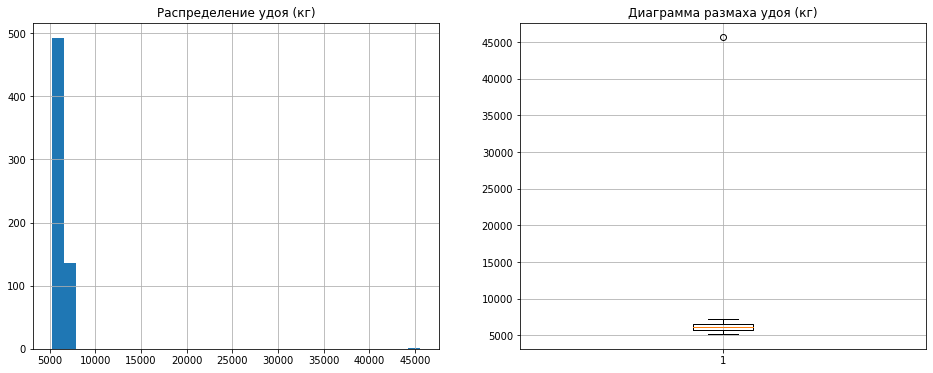

In [33]:
show_graph_1(ferma_main['удой_кг'], 'Распределение удоя (кг)', 'Диаграмма размаха удоя (кг)')

Наблюдается выброс удоя в размере 45616 кг, посчитаем его долю:

In [34]:
percentage = len(ferma_main[ferma_main['удой_кг'] > 45000]) / len(ferma_main['удой_кг'])
print(f'Доля строк с выбросами - {percentage:.2%}')

Доля строк с выбросами - 0.16%


Доля одного выброса довольно низкая (0.16%), поэтому избавимся от него:

In [35]:
ferma_main = ferma_main.query('удой_кг != 45616')

Проверим, как изменились диаграммы после удаления выброса:

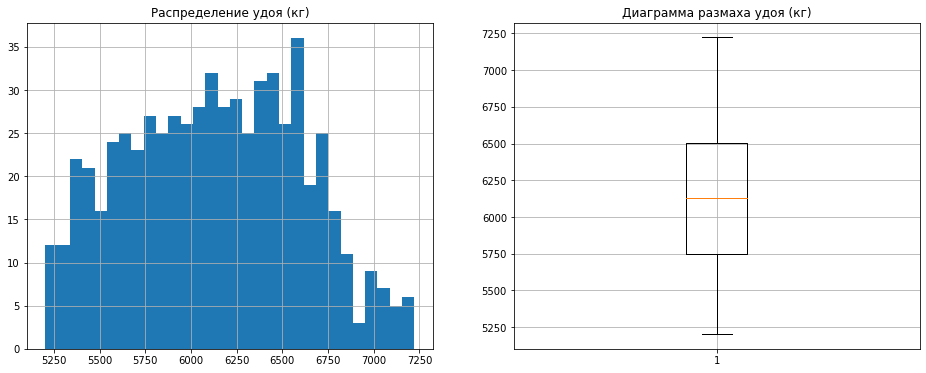

In [36]:
show_graph_1(ferma_main['удой_кг'], 'Распределение удоя (кг)', 'Диаграмма размаха удоя (кг)')

После удаления выброса распределение признака приближено к нормальному.

Отобразим гистограмму и "ящик с усами" для столбца `эке_(энергетическая_кормовая_единица)`:

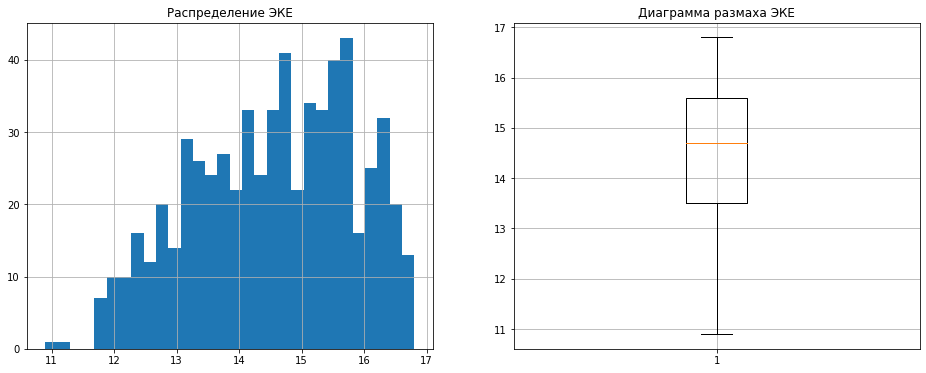

In [37]:
show_graph_1(ferma_main['эке_(энергетическая_кормовая_единица)'], 'Распределение ЭКЕ', 'Диаграмма размаха ЭКЕ')

Ярко выраженных аномальных значений нет, распределение признака имеет пики, отличается от нормального. Данные можно использовать дальше в модели.

Отобразим гистограмму и "ящик с усами" для столбца `сырой_протеин_г`:

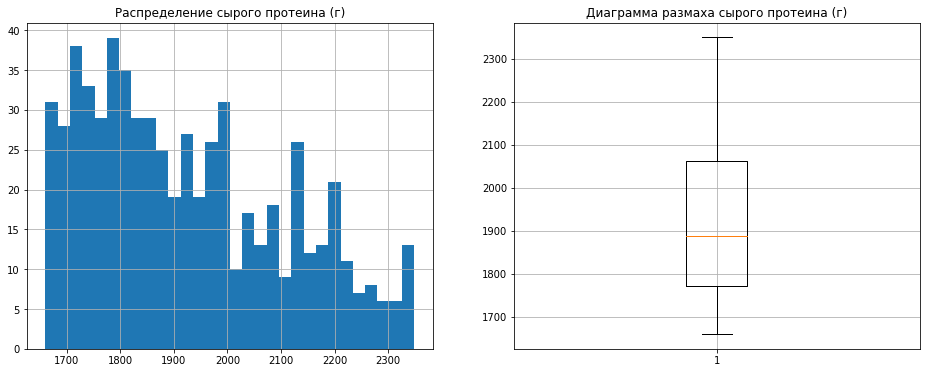

In [38]:
show_graph_1(ferma_main['сырой_протеин_г'], 'Распределение сырого протеина (г)', 'Диаграмма размаха сырого протеина (г)')

Аномалий не замечается, распределение признака имеет пики, отличается от нормального.

Отобразим гистограмму и "ящик с усами" для столбца `спо_(сахаро_протеиновое_соотношение)`:

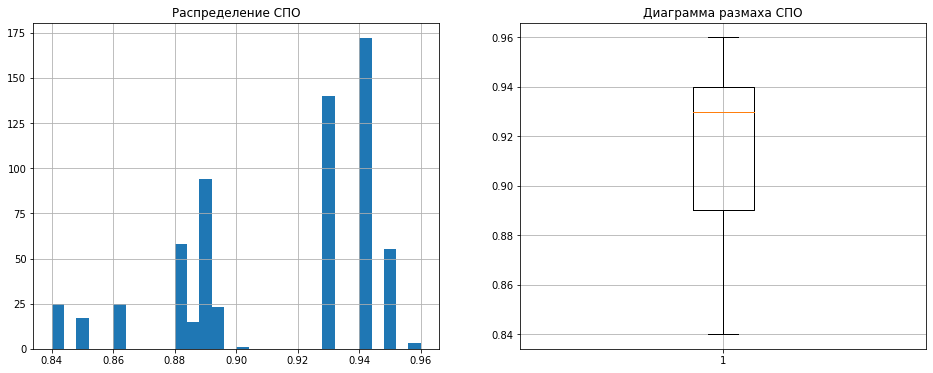

In [39]:
show_graph_1(ferma_main['спо_(сахаро_протеиновое_соотношение)'], 'Распределение СПО', 'Диаграмма размаха СПО')

Аномалий в данных не наблюдается, распределение признака отличается от нормального (вероятно, из-за специфики самого признака).

Отобразим гистограмму и "ящик с усами" для столбца `жирность_%`:

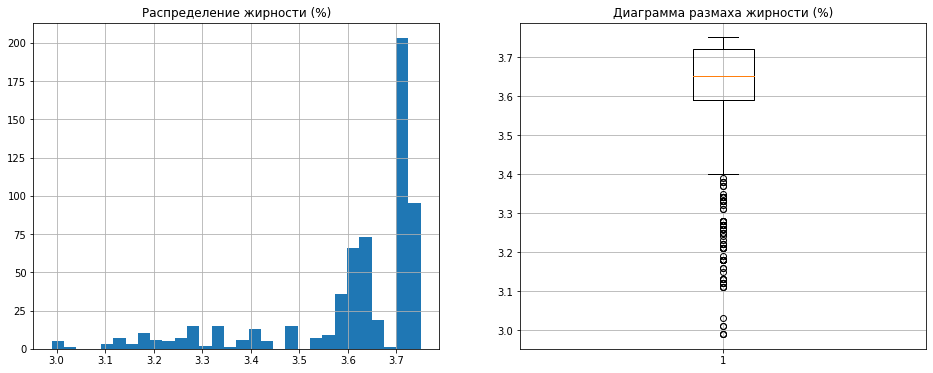

In [40]:
show_graph_1(ferma_main['жирность_%'], 'Распределение жирности (%)', 'Диаграмма размаха жирности (%)')

Наблюдается достаточно большое количество выбросов, посчитаем их долю:

In [41]:
percentage = len(ferma_main[ferma_main['жирность_%'] < 3.4]) / len(ferma_main['жирность_%'])
print(f'Доля строк с выбросами - {percentage:.2%}')

Доля строк с выбросами - 13.69%


Доля выбросов довольно большая (13.69%), поэтому не стоит аномальные значения удалять или заменять на медиану или среднее. Распределение признака отличается от нормального.

Отобразим гистограмму и "ящик с усами" для столбца `белок_%`:

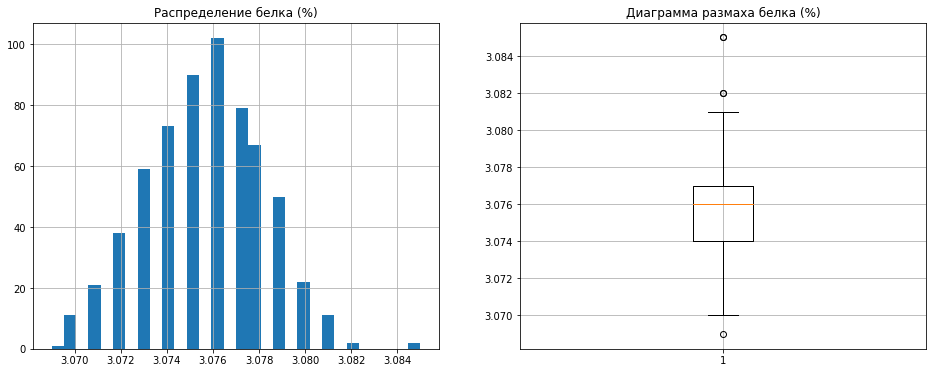

In [42]:
show_graph_1(ferma_main['белок_%'], 'Распределение белка (%)', 'Диаграмма размаха белка (%)')

Посчитаем долю аномальных значений:

In [43]:
percentage = len(ferma_main[(ferma_main['белок_%'] < 3.07) | (ferma_main['белок_%'] > 3.081)]) / len(ferma_main['белок_%'])
print(f'Доля строк с выбросами - {percentage:.2%}')

Доля строк с выбросами - 0.80%


Доля пяти выбросов довольно низкая (0.8%), поэтому можно их исключить из выборки:

In [44]:
ferma_main = ferma_main[(ferma_main['белок_%'] >= 3.07) & (ferma_main['белок_%'] <= 3.081)]

Распределение признака - нормальное.

#### Категориальные признаки

Определим качественные признаки датафрейма `ferma_main`:

In [45]:
get_col(ferma_main, False)

['порода',
 'тип_пастбища',
 'порода_папы_быка',
 'вкус_молока',
 'возраст',
 'имя_папы']

Проведем исследовательский анализ категориальных данных датафрейма `ferma_main`.

Отобразим столбчатую и круговую диаграммы для столбца `порода`:

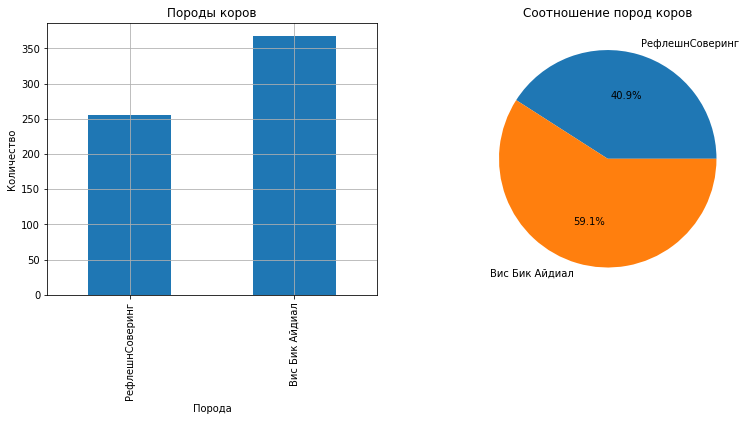

In [46]:
show_graph_2(ferma_main['порода'], 'Породы коров', 'Порода', 'Соотношение пород коров')

Соотношение пород коров: Вис Бик Айдиал - 59%, РефлешнСоверинг - 41%.

Отобразим столбчатую и круговую диаграммы для столбца `тип_пастбища`:

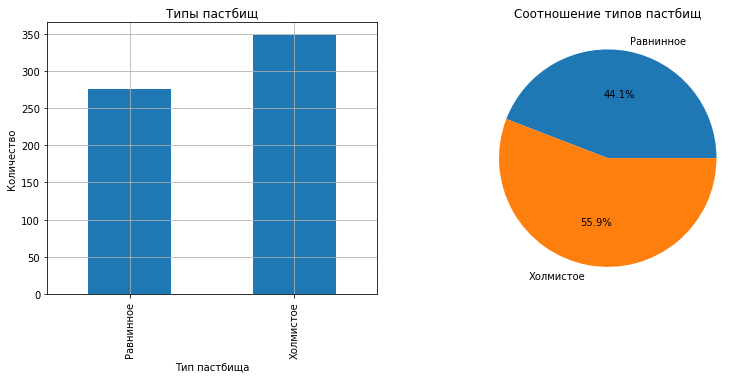

In [47]:
show_graph_2(ferma_main['тип_пастбища'], 'Типы пастбищ', 'Тип пастбища', 'Соотношение типов пастбищ')

Холмистые пастбища (56%) преобладают над равнинными (44%).

Отобразим столбчатую и круговую диаграммы для столбца `порода_папы_быка`:

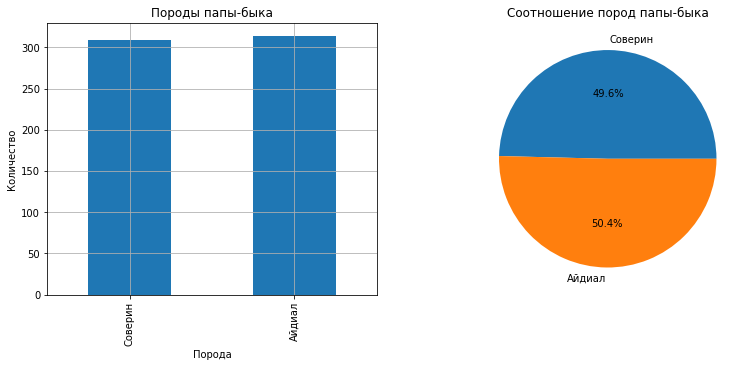

In [48]:
show_graph_2(ferma_main['порода_папы_быка'], 'Породы папы-быка', 'Порода', 'Соотношение пород папы-быка')

Породы папы-быка примерно в равном соотношении между Айдиал и Соверин.

Отобразим столбчатую и круговую диаграммы для столбца `вкус_молока`:

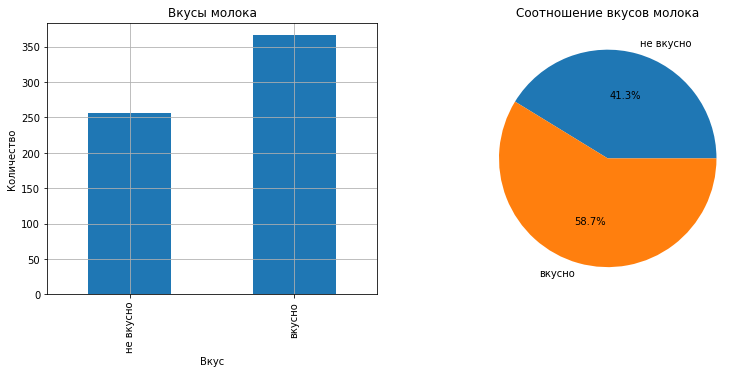

In [49]:
show_graph_2(ferma_main['вкус_молока'], 'Вкусы молока', 'Вкус', 'Соотношение вкусов молока')

Вкусного молока больше (59%), нежели невкусного (41%).

Отобразим столбчатую и круговую диаграммы для столбца `возраст`:

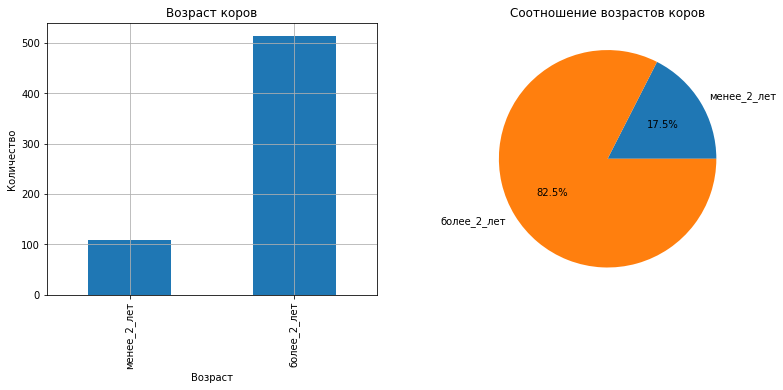

In [50]:
show_graph_2(ferma_main['возраст'], 'Возраст коров', 'Возраст', 'Соотношение возрастов коров')

Преобладающая часть коров (83%) - старше 2 лет.

Отобразим столбчатую и круговую диаграммы для столбца `имя_папы`:

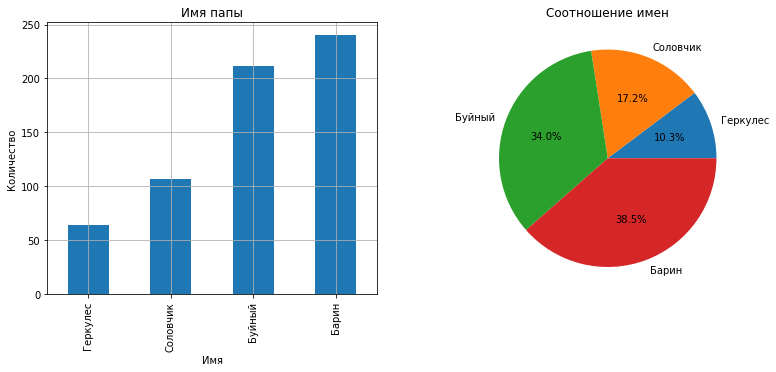

In [51]:
show_graph_2(ferma_main['имя_папы'], 'Имя папы', 'Имя', 'Соотношение имен')

Преобладающее большинство коров имеют отцов Барина (39%) и Буйного (34%).

### Датафрейм `cow_buy`

#### Количественные признаки

Определим количественные признаки датафрейма `cow_buy`:

In [52]:
get_col(cow_buy, True)

['текущая_жирность_%', 'текущий_уровень_белок_%']

Проведем исследовательский анализ количественных данных датафрейма `cow_buy`. Выведем характеристики, дающие представление о выборке (числовое описание данных):

In [53]:
cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
текущая_жирность_%,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
текущий_уровень_белок_%,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


Отобразим гистограмму и "ящик с усами" для столбца `текущая_жирность_%`:

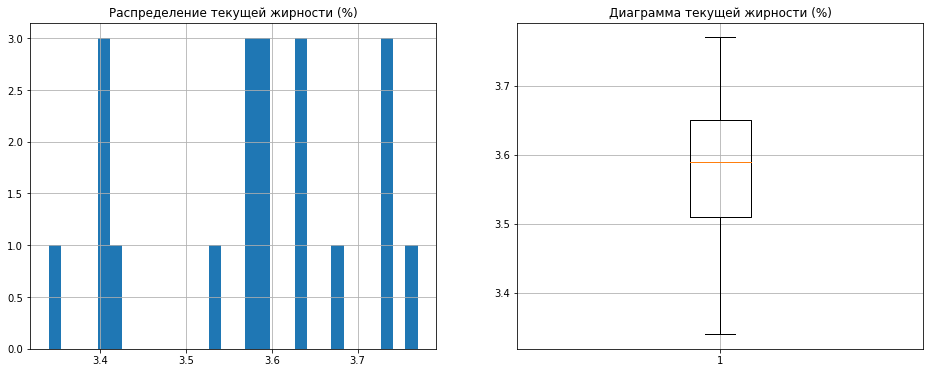

In [54]:
show_graph_1(cow_buy['текущая_жирность_%'], 'Распределение текущей жирности (%)', 'Диаграмма текущей жирности (%)')

Ярко выраженных аномальных значений нет, данные находятся в тех же диапазонах, что и в основной таблице. По распределению данных ничего сказать нельзя в виду их малого количества.

Отобразим гистограмму и "ящик с усами" для столбца `текущий_уровень_белок_%`:

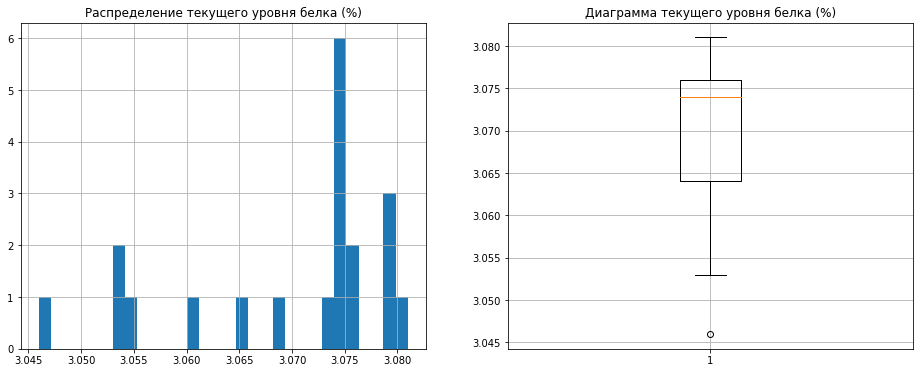

In [55]:
show_graph_1(cow_buy['текущий_уровень_белок_%'], 'Распределение текущего уровня белка (%)', 'Диаграмма текущего уровня белка (%)')

Аномалий в данных не наблюдается. По распределению данных ничего сказать нельзя в виду их малого количества.

#### Категориальные признаки

Определим качественные признаки датафрейма `cow_buy`:

In [56]:
get_col(cow_buy, False)

['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']

Проведем исследовательский анализ категориальных данных датафрейма `cow_buy`.

Отобразим столбчатую и круговую диаграммы для столбца `порода`:

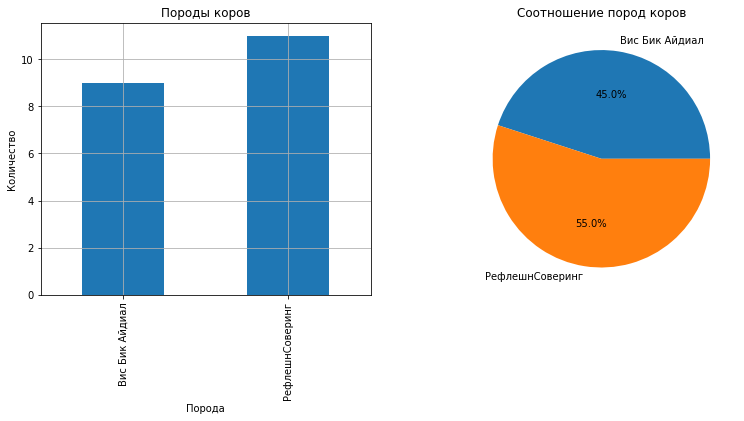

In [57]:
show_graph_2(cow_buy['порода'], 'Породы коров', 'Порода', 'Соотношение пород коров')

В датафрейме 55% коров породы РефлешнСоверинг и 45% - породы Вис Бик Айдиал.

Отобразим столбчатую и круговую диаграммы для столбца `тип_пастбища`:

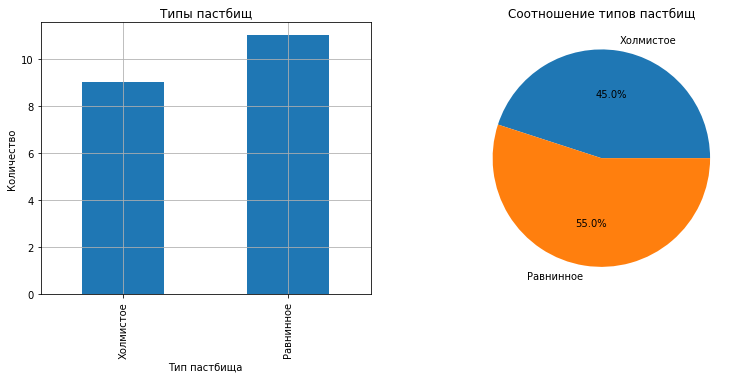

In [58]:
show_graph_2(cow_buy['тип_пастбища'], 'Типы пастбищ', 'Тип пастбища', 'Соотношение типов пастбищ')

В датафрейме 55% равнинных пастбищ и 45% - холмистых.

Отобразим столбчатую и круговую диаграммы для столбца `порода_папы_быка`:

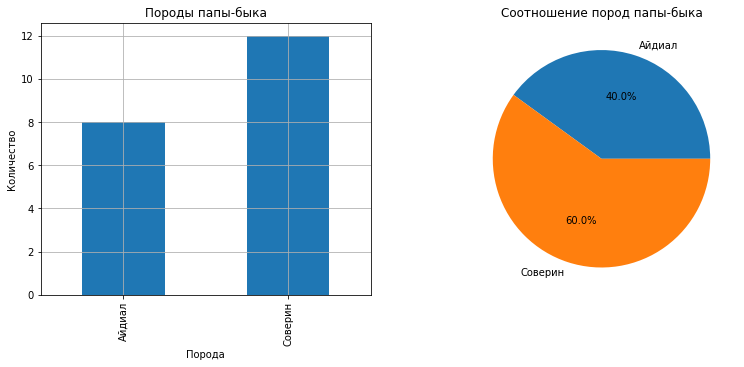

In [59]:
show_graph_2(cow_buy['порода_папы_быка'], 'Породы папы-быка', 'Порода', 'Соотношение пород папы-быка')

Около 60% всех коров породы Соверин и 40% - породы Айдиал.

Отобразим столбчатую и круговую диаграммы для столбца `имя_папы`:

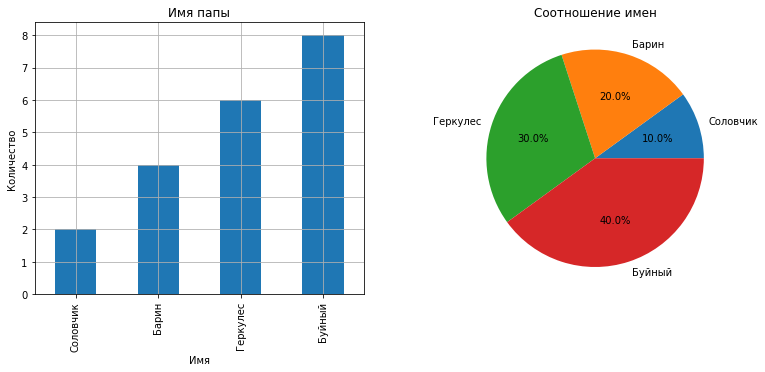

In [60]:
show_graph_2(cow_buy['имя_папы'], 'Имя папы', 'Имя', 'Соотношение имен')

Преобладающее большинство коров имеют отцов Буйного (40%) и Геркулеса (30%).

Отобразим столбчатую и круговую диаграммы для столбца `возраст`:

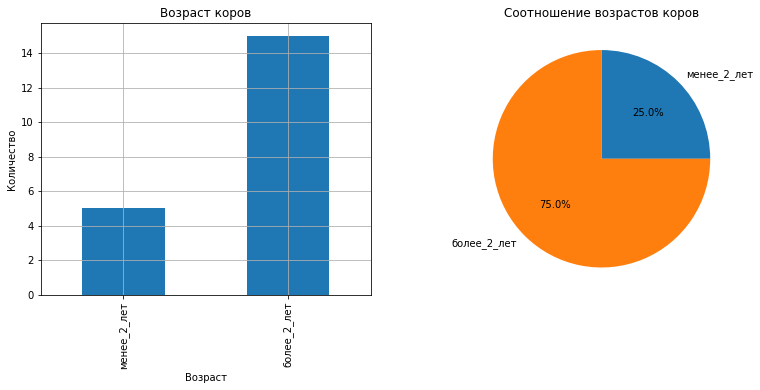

In [61]:
show_graph_2(cow_buy['возраст'], 'Возраст коров', 'Возраст', 'Соотношение возрастов коров')

Преобладающая часть коров (75%) - старше 2 лет.

Проведен исследовательский анализ данных в датафреймах, данные готовы для проведения дальнейшего анализа и построения моделей.

## Корреляционный анализ

Изучим взаимосвязь между признаками датафрейма `ferma_main` - рассчитаем коэффициенты корреляции между всеми признаками:

In [62]:
phik_matrix = ferma_main.drop('id', axis=1).phik_matrix(interval_cols=['удой_кг', 'эке_(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо_(сахаро_протеиновое_соотношение)', 'жирность_%', 'белок_%']);
phik_matrix.T

,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,имя_папы
удой_кг,1.000000,0.720303,0.466145,0.661352,0.162958,0.274778,0.518814,0.707631,0.233484,0.173285,0.998067,0.433260
эке_(энергетическая_кормовая_единица),0.720303,1.000000,0.451619,0.591611,0.115077,0.103464,0.173375,0.717536,0.000000,0.273181,0.772487,0.081018
сырой_протеин_г,0.466145,0.451619,1.000000,0.387949,0.085472,0.084767,0.000000,0.403626,0.225745,0.173276,0.348442,0.099075
спо_(сахаро_протеиновое_соотношение),0.661352,0.591611,0.387949,1.000000,0.052108,0.145166,0.427383,0.643040,0.000000,0.572829,0.748693,0.407679
порода,0.162958,0.115077,0.085472,0.052108,1.000000,0.206840,0.093854,0.222665,0.375280,0.000000,0.053406,0.378483
тип_пастбища,0.274778,0.103464,0.084767,0.145166,0.206840,1.000000,0.000000,0.000000,0.149085,0.268762,0.123505,0.226376
порода_папы_быка,0.518814,0.173375,0.000000,0.427383,0.093854,0.000000,1.000000,0.000000,0.078668,0.000000,0.351328,0.983494
жирность_%,0.707631,0.717536,0.403626,0.643040,0.222665,0.000000,0.000000,1.000000,0.000000,0.201406,0.682940,0.097142
белок_%,0.233484,0.000000,0.225745,0.000000,0.375280,0.149085,0.078668,0.000000,1.000000,0.107450,0.000000,0.087294
вкус_молока,0.173285,0.273181,0.173276,0.572829,0.000000,0.268762,0.000000,0.201406,0.107450,1.000000,0.156310,0.000000


Отобразим матрицу корреляций (для всех видов признаков) с помощью тепловой карты:

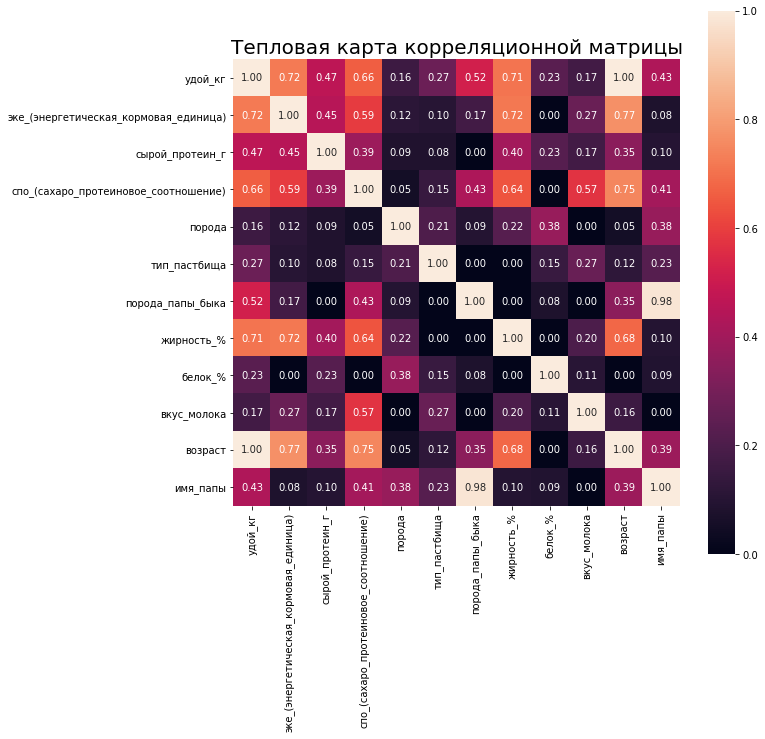

In [63]:
plt.figure(figsize=(10, 10))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', square=True);
plt.title('Тепловая карта корреляционной матрицы', fontsize=20);

Светлые тона тепловой карты говорят о сильной линейной зависимости, а темные - о слабой. Судя по тепловой карте, самая сильная прямая связь с целевым признаком `удой_кг` у входных признаков `эке_(энергетическая_кормовая_единица)`, `жирность_%` и `возраст`, еще связь заметна с признаками `спо_(сахаро_протеиновое_соотношение)` и `порода_папы_быка`.

Построим диаграммы рассеяния для целевого признака `удой_кг` и всех количественных признаков:

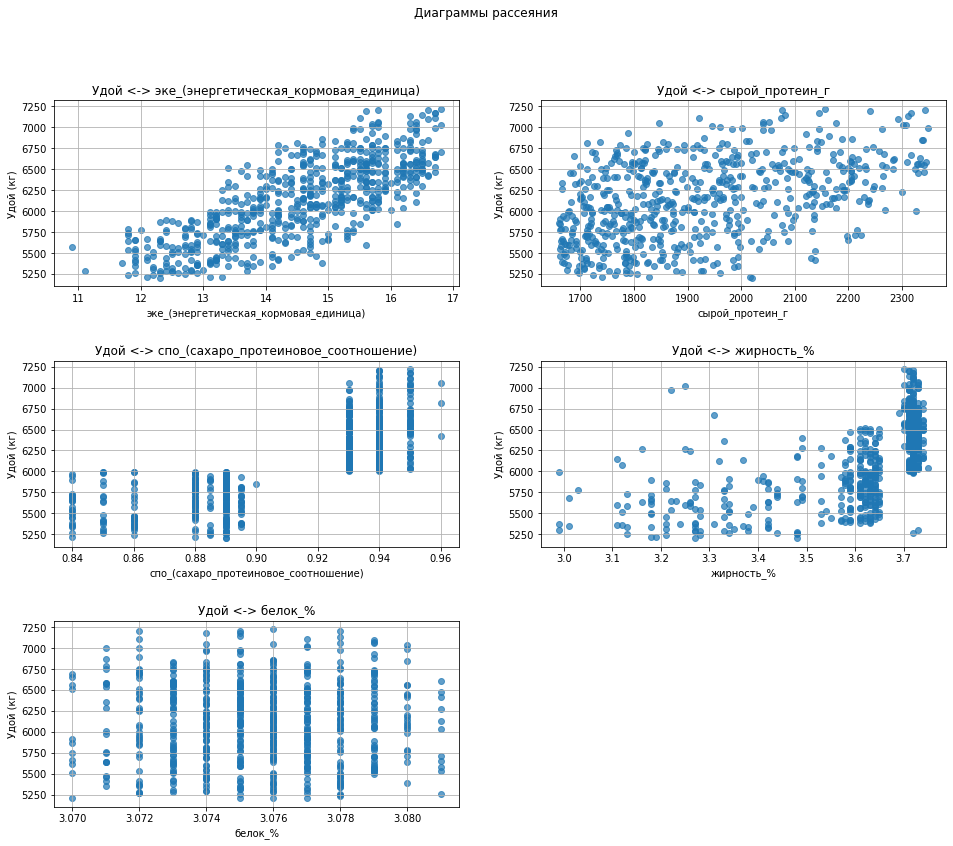

In [64]:
col_list = get_col(ferma_main.drop(['id', 'удой_кг'], axis=1), True)
plt.figure(figsize=(16, 13)).suptitle('Диаграммы рассеяния')
for i in col_list:
    plt.subplot(3, 2, list(col_list).index(i) + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.scatter(x=ferma_main[i], y=ferma_main['удой_кг'], alpha=0.7)
    plt.grid(True)
    plt.title(f'Удой <-> {i}')
    plt.xlabel(i)
    plt.ylabel('Удой (кг)')
plt.show()

Взаимосвязь целевого признака `удой_кг` с признаками:
1. `эке_(энергетическая_кормовая_единица)` - нелинейная связь: с повышением признака увеличивается и целевой признак
2. `сырой_протеин_г` - связь с целевым признаком линейная, слабо выраженная
3. `спо_(сахаро_протеиновое_соотношение)` и `белок_%` - нелинейная связь, данные ограничены двенадцатью значениями в датафрейме, из-за чего на диаграмме зависимости целевого признака с ними точки выстраиваются в вертикальные линии: на графике видно постоянную зависимость на разных уровнях, в рамках этих групп значения разбросы по всему диапазону
4. `жирность_%` - также нелинейная связь с целевым признаком, выделяются два крупных кластера значений в промежутке между 3.6 и 3.75

Построим диаграммы рассеяния для целевого признака `удой_кг` и всех количественных признаков с учетом значения категориальных признаков:

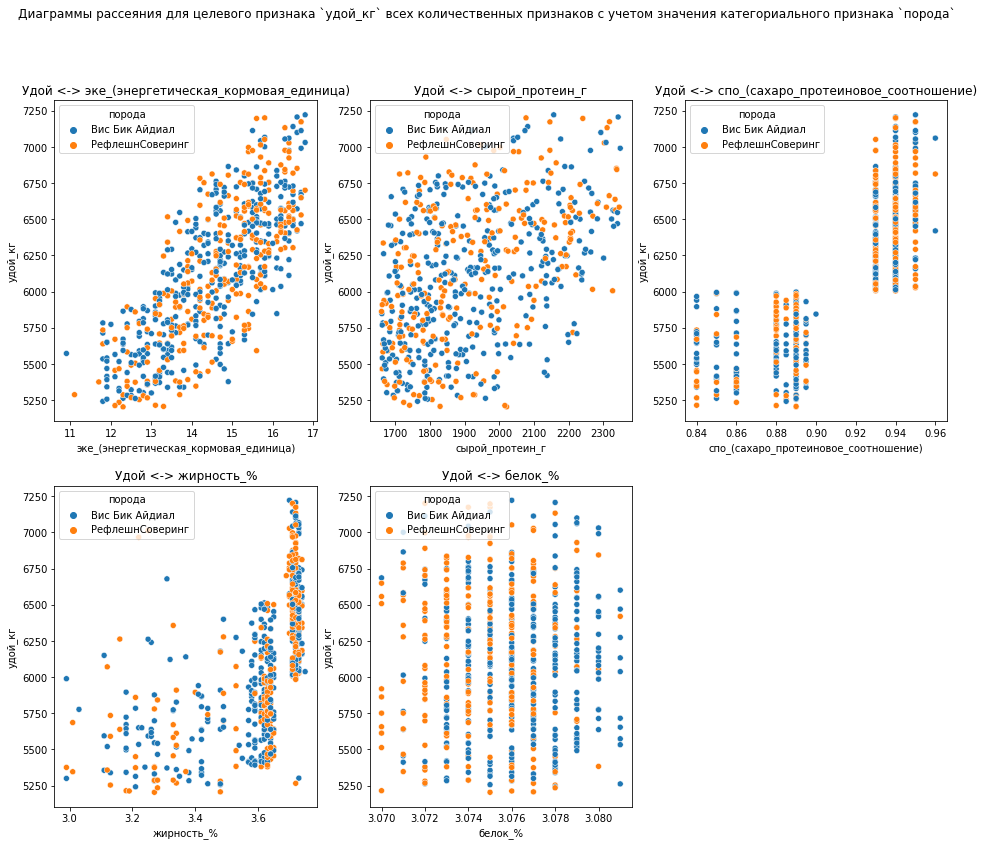

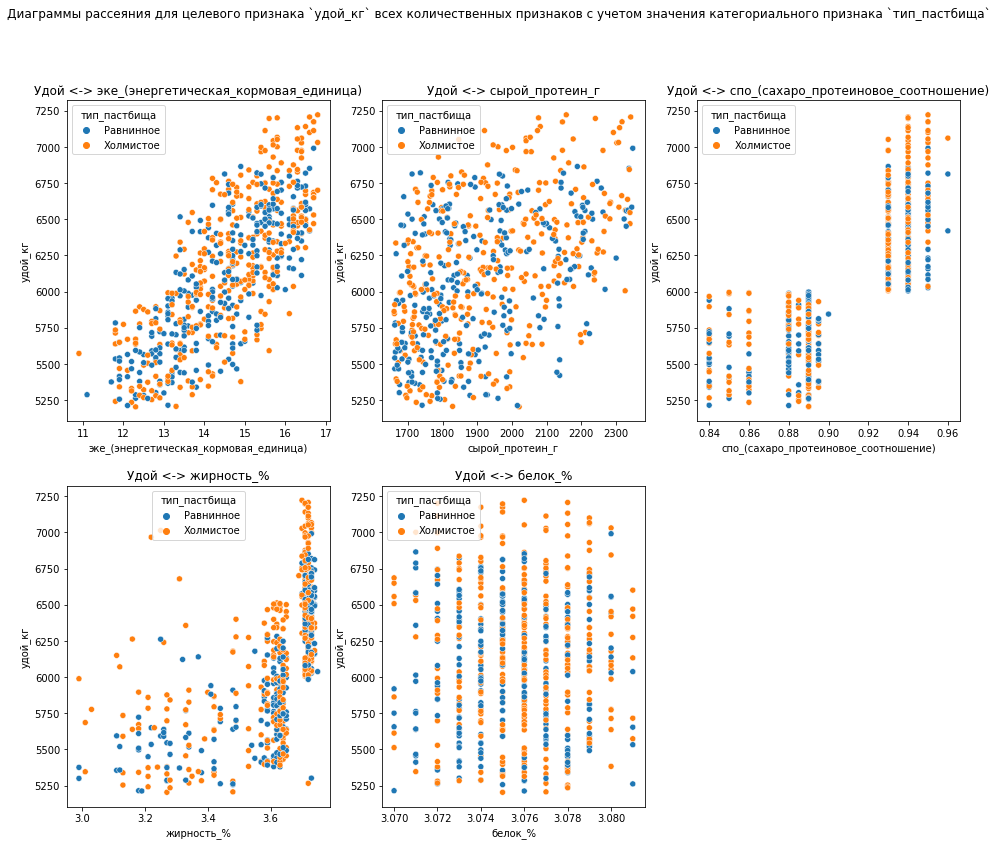

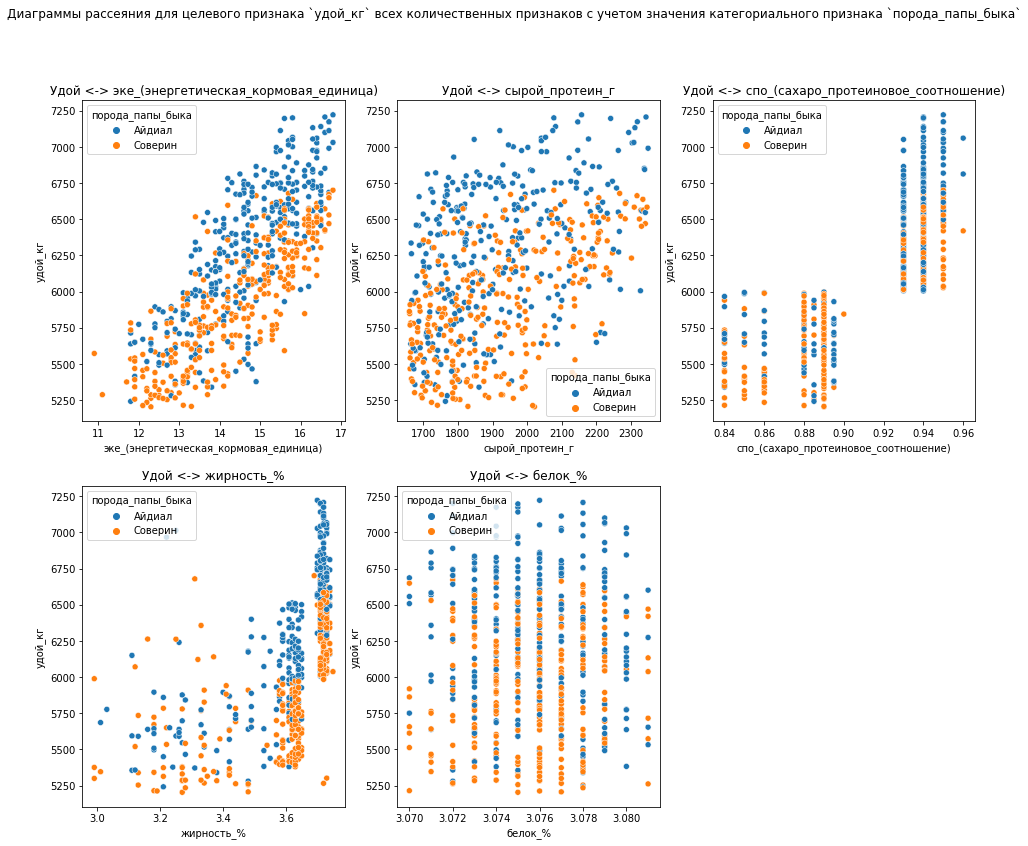

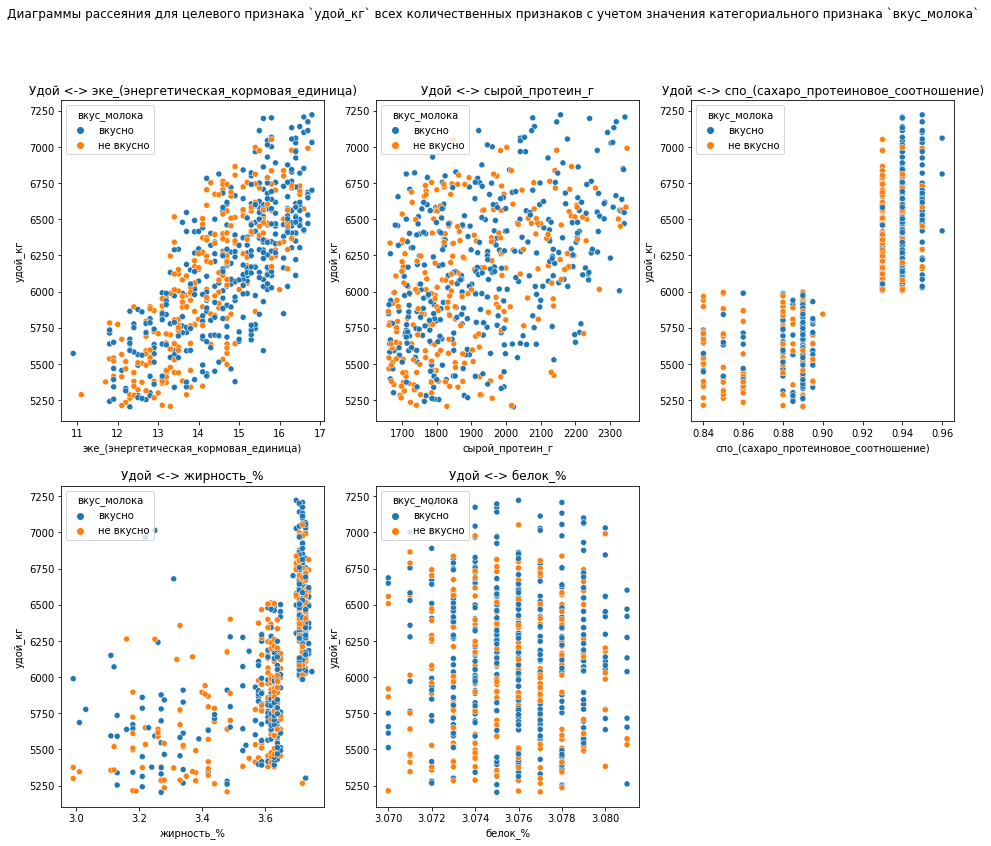

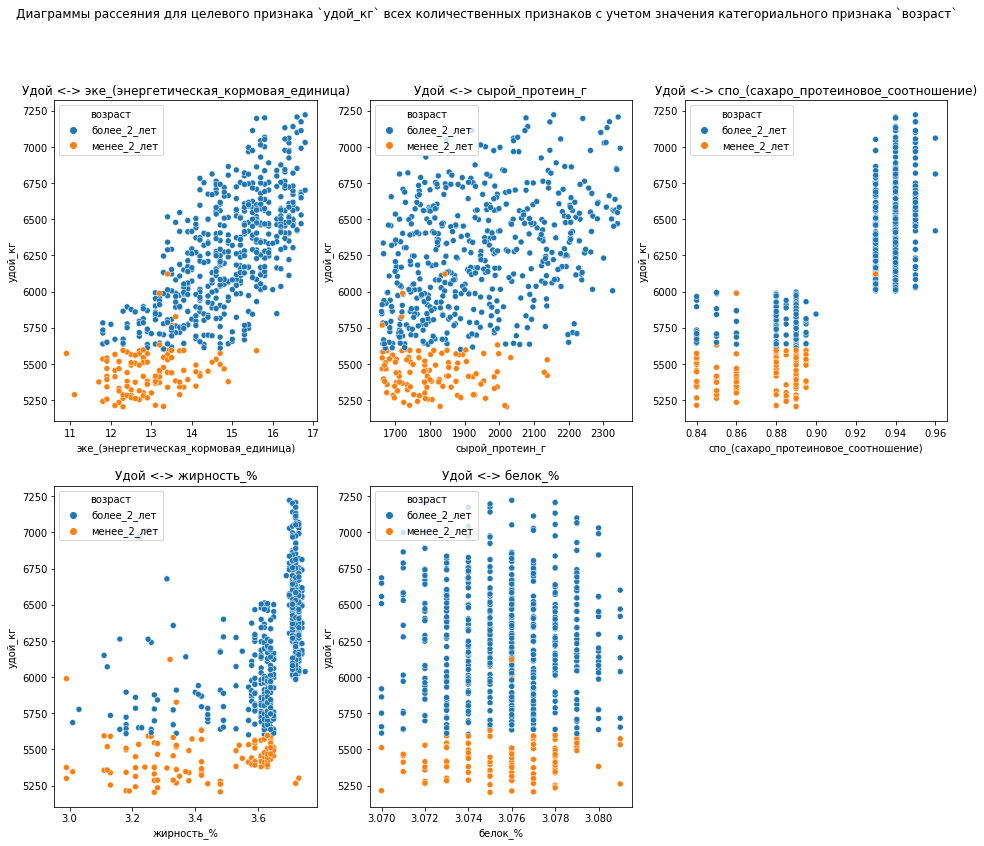

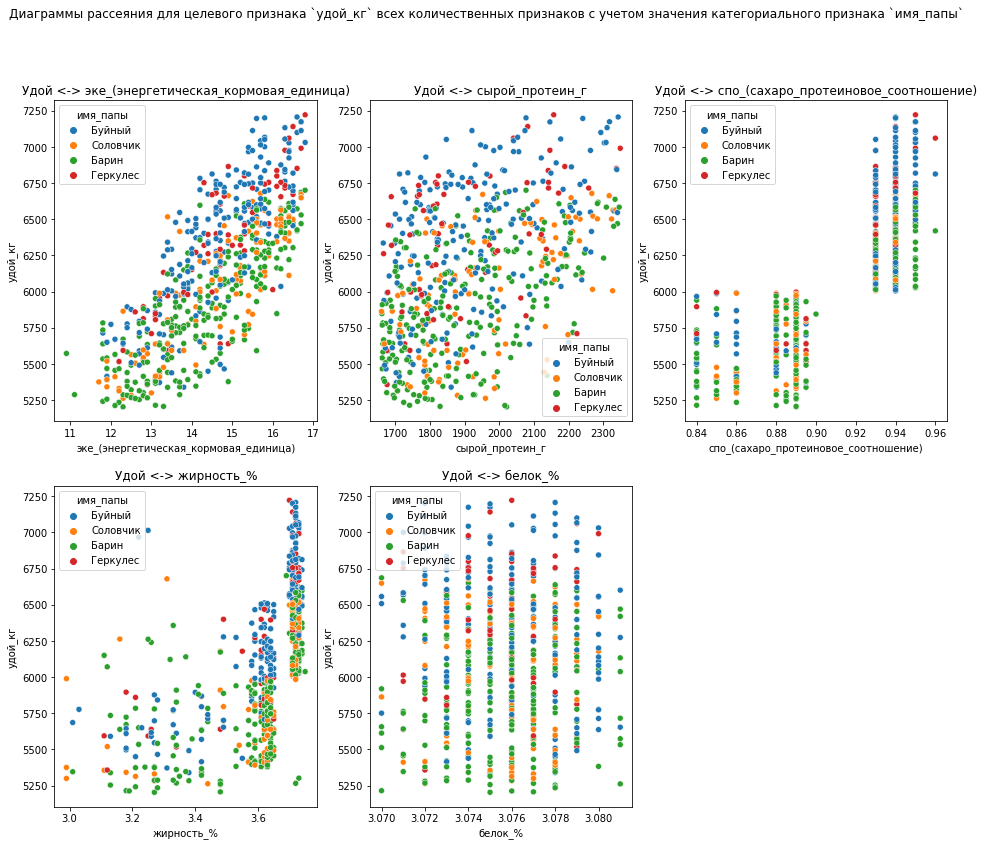

In [66]:
col_list = get_col(ferma_main.drop(['id', 'удой_кг'], axis=1), True)
cat_list = get_col(ferma_main, False)
for i in cat_list:
    plt.figure(figsize=(16, 13)).suptitle(f'Диаграммы рассеяния для целевого признака `удой_кг` всех количественных признаков с учетом значения категориального признака `{i}`')
    for j in col_list:
        plt.subplot(2, 3, list(col_list).index(j) + 1)
        sns.scatterplot(data=ferma_main, x=j, y='удой_кг', hue=i)
        plt.title(f'Удой <-> {j}')
    plt.show()

Влияние категориальных признаков на целевой признак `удой_кг`:
1. `порода` - распределение по породам примерно равномерное, порода РефлешнСоверинг дает молоко с более высокой жирностью и высоким содержанием СПО
2. `тип_пастбища` - также распределение по типам пастбищ примерно равномерное, холмистые пастбища дают более высокий удой с более высокой жирностью и высоким СПО
3. `порода_папы_быка` - порода Айдиал дает более высокий удой, молоко имеет более высокую жирность и СПО
4. `вкус_молока` - вкусное молоко характеризуется более высокой жирностью и СПО
5. `возраст` - все показатели выше у коров старше 2 лет
6. `имя_папы` - распределение по породам примерно равномерное, коровы, имкющие отца Буйного дают более жирное молоко

Добавление новых признаков не требуется. Мультиколлинеарность обнаружена между признаками `имя_папы` и `порода_папы_быка`, можно убрать менее детализированный признак.

На построенных ранее диаграммах рассеяния можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии:
1. `спо_(сахаро_протеиновое_соотношение)` и `удой_кг` связаны нелинейно - на их диаграмме рассеяния наблюдения сгруппированы в два кластера, причем есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем `спо_(сахаро_протеиновое_соотношение)` в категориальный бинарный признак, использовав эту границу:

In [67]:
def spo_to_binary(row):
    if row['спо_(сахаро_протеиновое_соотношение)'] < 0.92:
        return 0
    else:
        return 1
ferma_main['спо_кат'] = ferma_main.apply(spo_to_binary, axis=1)

2. `эке_(энергетическая_кормовая_единица)` и `удой_кг` также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак `эке_(энергетическая_кормовая_единица)` в квадрате:

In [68]:
ferma_main['эке_2'] = ferma_main['эке_(энергетическая_кормовая_единица)'] ** 2

## Обучение модели линейной регрессии

Создадим функцию для построения моделей линейной и логистической регрессий:

In [69]:
# model_type - 'linear' или 'logistic'
def get_model(X, y, model_type):
    
    # определим качественные и количественные признаки:
    cat_col_names = get_col(X, False)
    num_col_names = get_col(X, True)
    
    # разобъем данные на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # кодируем категориальные признаки с помощью OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    encoder_col_names = encoder.get_feature_names()
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    # масштабируем количественные признаки с помощью StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # объединим все преобразованные данные в тренировочный и тестовый датафреймы и сбросим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # обучим модель линейной регрессии на подготовленных данных
    if model_type == 'linear':
        model = LinearRegression()
    else:
        if model_type == 'logistic':
            model = LogisticRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    return [y_test, predictions, model, X_test]

Для анализа остатков модели создадим функцию для построения гистограммы частотности распределения и диаграммы рассеяния:

In [70]:
def show_graph_3(y_test, predictions):
    # расчет остатков
    residuals = y_test - predictions

    # построение гистограммы частотности распределения 
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.hist(residuals, bins=50)
    plt.title('Гистограмма распределения остатков')
    plt.xlabel('Остатки')
    plt.vlines(x=0, colors='blue', ymin=0, ymax=12, linestyles='--', label='Средняя сумма остатков')
    plt.vlines(x=residuals.median(), colors='red', ymin=0, ymax=12, label='Смещение медианы')
    plt.legend()
    
    # построение диаграммы рассеяния
    plt.subplot(1, 2, 2)
    plt.scatter(x=predictions, y=residuals)
    plt.xlabel('Предсказания модели')
    plt.ylabel('Остатки')
    plt.title('Анализ дисперсии')
    plt.show()

### Модель №1

Подготовим данные датафрейма `ferma_main` и обучим на них первую модель LinearRegression.

Целевой признак - `удой_кг`

Признаки, подходящие для модели линейной регрессии:
* `эке_(энергетическая_кормовая_единица)` - показатель питательности корма коровы, удой должен от него зависеть
* `сырой_протеин_г` - также показатель корма, удой должен от него зависеть
* `спо_(сахаро_протеиновое_соотношение)` - еще один показатель корма, от которого должен зависеть удой
* `порода` - у каждой породы коровы может быть разный удой молока
* `тип_пастбища` - целевой признак также может зависеть и от пастбища, где пасутся коровы
* `порода_папы_быка` - разные породы коров могут иметь разный удой молока
* `возраст` - влияющий на целевой показатель фактор

Признаки, не подходящие для модели линейной регрессии:
* `id` - идентификатор коровы в датасете никак не может влиять на целевой признак
* `жирность_%` - характеристика молока, никак не связан с целевым признаком
* `белок_%` - также характеристика молока, никак не связан с целевым признаком
* `вкус_молока` - оценка вкуса по личным критериям фермера, нет связи с целевым признаком
* `имя_папы` - добавим в Модель №3

Входные признаки:

In [71]:
X_m1 = ferma_main.drop(['id', 'удой_кг', 'жирность_%', 'белок_%', 'вкус_молока', 'имя_папы', 'спо_кат', 'эке_2'], axis=1)

Целевой признак:

In [72]:
y_m1 = ferma_main['удой_кг']

Построим первую модель LinearRegression:

In [73]:
model_lr_1 = get_model(X_m1, y_m1, 'linear')

Оценим качество модели на тестовой выборке:

1. Рассчитаем коэффициент детерминации R²:

In [74]:
r2_m1 = r2_score(model_lr_1[0], model_lr_1[1]) 
print(f'R² = {r2_m1:.3f}')

R² = 0.783


Значение коэффициента детерминации близко к единице - в 78% случаев предсказание модели ближе к истине, чем среднее значение целевого признака.

2. Проанализируем остатки с помощью графиков:

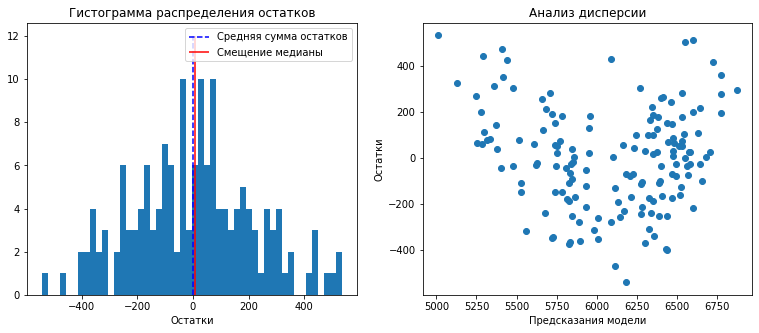

In [75]:
show_graph_3(model_lr_1[0], model_lr_1[1])

Гистограмма распределения остатков показывает равномерное распределение с незначительным смещением вправо - это говорит о том, что у модели стабильная ошибка на всех предсказаниях.

Анализ дисперсии выявил нелинейность распределенния остатков - об этом свидетельствует диаграмма рассеяния в виде дуги.

Дальнейшие шаги по улучшению модели в данном случае - трансформировать данные, чтобы изменить взаимосвязь входных признаков с целевым.

### Модель №2

Подготовим данные с учетом связи входных признаков с целевым и обучиим на них вторую модель LinearRegression.

Таргет и признаки модели те же, что и для модели №1, но теперь вместо признаков `спо_(сахаро_протеиновое_соотношение)` и `эке_(энергетическая_кормовая_единица)` в модель добавим их преобразованные варианты - `спо_кат` и `эке_2`.

Входные признаки:

In [76]:
X_m2 = ferma_main.drop(['id', 'удой_кг', 'жирность_%', 'белок_%', 'вкус_молока', 'имя_папы', 'спо_(сахаро_протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)'], axis=1)

Целевой признак:

In [77]:
y_m2 = ferma_main['удой_кг']

Построим вторую модель LinearRegression:

In [78]:
model_lr_2 = get_model(X_m2, y_m2, 'linear')

Оценим качество модели на тестовой выборке:

1. Рассчитаем коэффициент детерминации R²:

In [79]:
r2_m2 = r2_score(model_lr_2[0], model_lr_2[1]) 
print(f'R² = {r2_m2:.3f}')

R² = 0.835


Значение коэффициента детерминации по сравнению с первой моделью еще больше приблизилось к единице - в 84% случаев предсказание модели ближе к истине, чем среднее значение целевого признака.

2. Проанализируем остатки с помощью графиков:

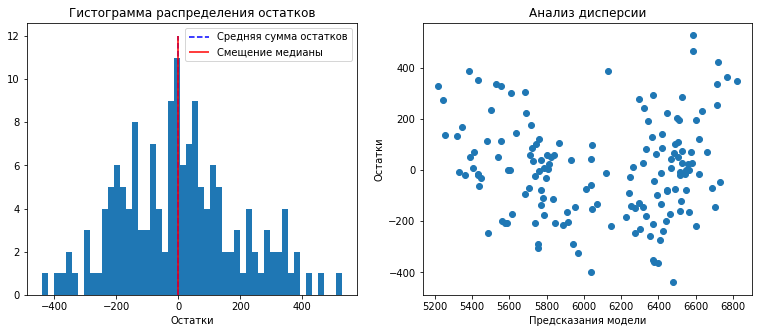

In [80]:
show_graph_3(model_lr_2[0], model_lr_2[1])

Гистограмма распределения остатков показывает равномерное распределение, по сравнению с первой моделью незначительное смещение вправо устранено, график симметричен относительно нуля. Получается, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель дает как завышенные, так и заниженные предсказания, которые "уравновешивают" друг друга. Вторая модель работает качественно.

Анализ дисперсии не выявил особых изменений по сравнению с первой моделью - диаграмма рассеяния в виде дуги.

Дальнейшие шаги по улучшению модели в данном случае - найти и добавить в модель дополнительные признаки.

### Модель №3

Добавим в данные новый признак `имя_папы` и обучим на них третью модель LinearRegression.

Входные признаки:

In [81]:
X_m3 = ferma_main.drop(['id', 'удой_кг', 'жирность_%', 'белок_%', 'вкус_молока', 'спо_(сахаро_протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)'], axis=1)

Целевой признак:

In [82]:
y_m3 = ferma_main['удой_кг']

Построим третью модель LinearRegression:

In [83]:
model_lr_3 = get_model(X_m3, y_m3, 'linear')

Оценим качество модели на тестовой выборке:

1. Рассчитаем коэффициент детерминации R²:

In [84]:
r2_m3 = r2_score(model_lr_3[0], model_lr_3[1]) 
print(f'R² = {r2_m3:.3f}')

R² = 0.841


Значение коэффициента детерминации по сравнению со второй моделью увеличилось незначительно - все так же в 84% случаев предсказание модели ближе к истине, чем среднее значение целевого признака.

2. Проанализируем остатки с помощью графиков:

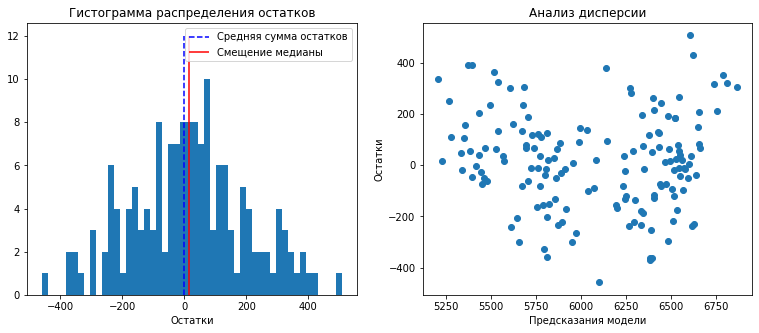

In [85]:
show_graph_3(model_lr_3[0], model_lr_3[1])

По сравнению со втрой моделью гистограмма распределения остатков показывает равномерное распределение с незначительным смещением вправо. Качество модели в этом плане ухудшилось.

Анализ дисперсии не выявил особых изменений по сравнению со второй моделью - диаграмма рассеяния в виде дуги.

### Сравнение качества моделей 

Сравним качество трех моделей линейной регрессии, сопоставим их коэффициенты детерминации и остатки:

In [86]:
models_lr = [model_lr_1, model_lr_2, model_lr_3]
compare_data_1 = {
    'Модель': [],
    'R²': [],
    'Среднее значение остатков': [],
    'Медианное значение остатков': []
}
i = 1
for item in models_lr:
    compare_data_1['Модель'].append(i)
    compare_data_1['R²'].append(round(r2_score(item[0], item[1]), 3))
    compare_data_1['Среднее значение остатков'].append(round((item[0] - item[1]).mean(), 3))
    compare_data_1['Медианное значение остатков'].append(round((item[0] - item[1]).median(), 3))
    i += 1
compare_table_1 = pd.DataFrame(compare_data_1)
compare_table_1

,Модель,R²,Среднее значение остатков,Медианное значение остатков
0,1,0.783,1.662,6.279
1,2,0.835,3.740,-0.889
2,3,0.841,16.984,16.997


По совокупности показателей вторая модель выглядит предпочтительнее, т.к. имеет высокое значение коэффициента детерминации и минимальное медианное значение остатков.

Оценим качество каждой модели по трем метрикам: MSE, RMSE, MAE:

In [87]:
compare_data_2 = {
    'Модель': [],
    'MSE': [],
    'RMSE': [],
    'MAE': []
}
i = 1
for item in models_lr:
    compare_data_2['Модель'].append(i)
    compare_data_2['MSE'].append(round(mean_squared_error(item[0], item[1], squared=True), 3))
    compare_data_2['RMSE'].append(round(mean_squared_error(item[0], item[1], squared=False), 3))
    compare_data_2['MAE'].append(round(mean_absolute_error(item[0], item[1]), 3))
    i += 1
compare_table_2 = pd.DataFrame(compare_data_2)
compare_table_2

,Модель,MSE,RMSE,MAE
0,1,47499.999,217.945,173.801
1,2,36207.490,190.283,149.720
2,3,34749.382,186.412,146.717


Лучшая модель - третья, т.к. она в среднем ошибается на 186.41 кг в прогнозах.

Рассчитаем доверительный интервал прогноза лучшей модели:

In [88]:
errors = model_lr_3[0] - model_lr_3[1]
print(f'95% доверительный интервал прогноза лучшей модели = ({np.quantile(errors, 0.025)}, {np.quantile(errors, 0.975)})')

95% доверительный интервал прогноза лучшей модели = (-360.6314300064198, 380.4421657475707)


### Прогнозирование удоя коров

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Добавим недостающие признаки `эке_(энергетическая_кормовая_единица)`, `спо_(сахаро_протеиновое_соотношение)` и `сырой_протеин_г` - возьмем из датафрейма `ferma_main` медианные значения каждого из признаков и увеличим их на 5%:

In [89]:
cow_buy['эке_(энергетическая_кормовая_единица)'] = ferma_main['эке_(энергетическая_кормовая_единица)'].median() * 1.05
cow_buy['спо_(сахаро_протеиновое_соотношение)'] = ferma_main['спо_(сахаро_протеиновое_соотношение)'].median() * 1.05
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].median() * 1.05

Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки:

In [90]:
cow_buy['эке_2'] = cow_buy['эке_(энергетическая_кормовая_единица)'] ** 2
cow_buy['спо_кат'] = cow_buy.apply(spo_to_binary, axis=1)

In [91]:
X, y = X_m3, y_m3

cat_col_names = get_col(X, False)
num_col_names = get_col(X, True)

# разобъем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# кодируем категориальные признаки с помощью OneHotEncoder
encoder_lr = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder_lr.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder_lr.transform(X_test[cat_col_names])
encoder_col_names = encoder_lr.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# масштабируем количественные признаки с помощью StandardScaler
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train[num_col_names])
X_test_scaled = scaler_lr.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединим все преобразованные данные в тренировочный и тестовый датафреймы и сбросим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

#print(predictions)

r2_m3 = r2_score(y_test, predictions) 
print(f'R² = {r2_m3:.3f}')

R² = 0.841


In [92]:
cow_buy_m3 = cow_buy.copy()
cow_buy_m3 = cow_buy_m3.drop(['текущая_жирность_%', 'текущий_уровень_белок_%', 'спо_(сахаро_протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)'], axis=1)

X_ohe = encoder_lr.transform(cow_buy_m3[cat_col_names])
encoder_col_names = encoder_lr.get_feature_names()
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = scaler_lr.transform(cow_buy_m3[num_col_names])
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

# объединим все преобразованные данные
X = pd.concat([X_ohe, X_scaled], axis=1)

predictions = model_lr.predict(X)
print(predictions)
print()

print('Cравним тренировочную и выбору для предсказания после масштабирования и кодирования:')
display(X.head(1), X_test.head(1))
print('Порядок колонок совпал, результаты масштабирования нигде не выезжают за пределы.')

[6619.80219018 6368.65118962 6294.14173082 6609.66295856 6555.1684427
 6453.04876828 6619.80219018 6567.14566742 6294.14173082 6411.16848076
 6344.62461069 6651.54324608 6619.80219018 6113.01259536 6294.14173082
 6609.66295856 6344.62461069 6453.04876828 6567.14566742 6555.1684427 ]

Cравним тренировочную и выбору для предсказания после масштабирования и кодирования:


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,сырой_протеин_г,спо_кат,эке_2
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.295239,0.791946,0.626039


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,сырой_протеин_г,спо_кат,эке_2
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.091918,-1.262713,-0.728438


Порядок колонок совпал, результаты масштабирования нигде не выезжают за пределы.


Получим прогноз удоя коров:

In [93]:
cow_buy['прогноз_удоя'] = np.round(predictions, 0)

По условию задачи с помощью модели нужно отобрать коров по среднему удою за год - не менее 6000 килограммов:

In [94]:
cow_buy[cow_buy['прогноз_удоя'] >= 6000]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро_протеиновое_соотношение),сырой_протеин_г,эке_2,спо_кат,прогноз_удоя
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6620.0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6369.0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6294.0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6610.0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6555.0
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6453.0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6620.0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6567.0
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6294.0
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6411.0


Получилось, что из 20 продаваемых коров по целевому признаку соответствуют все коровы.

## Обучение модели логистической регрессии

### Построение модели

Подготовим данные датафрейма `ferma_main` и обучим на них модель LogisticRegression.

Целевой признак - `вкус_молока`

Признаки, подходящие для модели логистической регрессии:
* `эке_(энергетическая_кормовая_единица)` - показатель питательности корма коровы, вкус молока должен от него зависеть (в модели будем использовать признак `эке_2`)
* `сырой_протеин_г` - также показатель корма, вкус молока должен от него зависеть
* `спо_(сахаро_протеиновое_соотношение)` - еще один показатель корма, от которого должен зависеть вкус молока (в модели будем использовать признак `спо_кат`)
* `порода` - у каждой породы коровы может быть разный вкус молока
* `тип_пастбища` - целевой признак также может зависеть и от пастбища, где пасутся коровы
* `порода_папы_быка` - разные породы коров могут иметь разный вкус молока
* `возраст` - влияющий на целевой показатель фактор
* `имя_папы` - влияющий на целевой показатель фактор
* `жирность_%` - характеристика молока, связана с целевым признаком
* `белок_%` - также характеристика молока, связана с целевым признаком

Входные признаки:

In [95]:
X_log_m1 = ferma_main.drop(['id', 'удой_кг', 'вкус_молока', 'эке_(энергетическая_кормовая_единица)', 'спо_(сахаро_протеиновое_соотношение)'], axis=1)

Целевой признак:

In [96]:
y_log_m1 = ferma_main['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

Построим модель LogisticRegression:

In [97]:
X, y = X_log_m1, y_log_m1

cat_col_names = get_col(X, False)
num_col_names = get_col(X, True)

# разобъем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# кодируем категориальные признаки с помощью OneHotEncoder
encoder_log = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder_log.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder_log.transform(X_test[cat_col_names])
encoder_col_names = encoder_log.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# масштабируем количественные признаки с помощью StandardScaler
scaler_log = StandardScaler()
X_train_scaled = scaler_log.fit_transform(X_train[num_col_names])
X_test_scaled = scaler_log.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединим все преобразованные данные в тренировочный и тестовый датафреймы и сбросим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_log = LogisticRegression()
model_log.fit(X_train, y_train)
predictions = model_log.predict(X_test)

Оценим качество модели на тестовой выборке:
1. Метрика Accuracy:

In [98]:
round(accuracy_score(y_test, predictions), 3)

0.615

Доля верных ответов модели классификации - 61.5%

2. Метрика Precision:

In [99]:
round(precision_score(y_test, predictions), 3)

0.622

В 62% модель присваивает объектам класс 1.

3. Метрика Recall:

In [100]:
round(recall_score(y_test, predictions), 3)

0.793

В 79% модель классификации присваивает класс 1 всем объектам этого класса.

Построим матрицу ошибок:

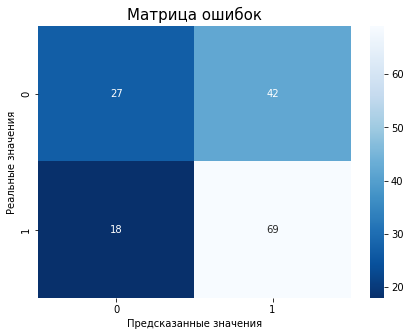

In [101]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Реальные значения')
plt.xlabel('Предсказанные значения');
plt.title('Матрица ошибок', fontsize=15);

Из матрицы ошибок видно:
* в 27 случаях модель правильно отнесла невкусное молоко к категории "не вкусно"
* в 69 случаях модель правильно отнесла вкусное молоко к категории "вкусно"
* в 42 случаях модель неправильно отнесла невкусное молоко к категории "вкусно"
* в 18 случаях модель неправильно отнесла вкусное молоко к категории "не вкусно"

### Анализ модели логистической регрессии

Для заказчика главным критерием является вкусное молоко, поэтому для него важно, чтобы среди купленных им коров было минимальное количство таких, которые дают невкусное молоко.

*Ошибка первого рода* - в этом случае модель рекомендует фермеру приобрести коров с невкусным молоком.

*Ошибка второго рода* - в этом случае модель не рекомендует фермеру приобрести коров с вкусным молоком.

Получается, что в нашем случае критичнее ошибки первого рода (т.к. лучше приобрести коров с вкусным молоком, чем не приобрести таких коров), поэтому ошибки False Positive (FP) необходимо сводить к минимуму. Ошибки FP используются в метрике Precision, поэтому ее необходимо максимизировать путем уменьшения FP.

Стандартный порог для определения метки класса объекта в модели логистической регрессии составляет 0.5. Необходимо грамотно настроить сдвиг порога, чтобы модель стала более точной.

Выведем вероятности класса `predict_proba()` и правильные ответы:

In [102]:
y_proba = model_log.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_test', 'y_proba']).sort_values(by='y_proba', ascending=False)
print(data.head())

     y_test   y_proba
32        1  0.877283
112       1  0.862651
26        1  0.859051
115       1  0.857092
83        1  0.853399


Подберем такое пороговое значение, которое будет давать 0 ошибок False Positive (т.е. Precision = 1):

In [103]:
compare_data_3 = {
    'Порог': [],
    'Precision': [],
    'Recall': []
}
thresholds = [round(i, 2) for i in np.linspace(0.5, 1, num = 40, endpoint=False)]
for i in thresholds:
    tmp = data['y_proba'].apply(lambda x: 1 if x > i else 0)
    compare_data_3['Порог'].append(i)
    compare_data_3['Precision'].append(precision_score(data['y_test'], tmp))
    compare_data_3['Recall'].append(recall_score(data['y_test'], tmp))
    if precision_score(data['y_test'], tmp) == 1:
        threshold = i
        break
compare_table_3 = pd.DataFrame(compare_data_3)
compare_table_3

,Порог,Precision,Recall
0,0.50,0.621622,0.793103
1,0.51,0.614679,0.770115
2,0.52,0.616822,0.758621
3,0.54,0.630000,0.724138
4,0.55,0.639175,0.712644
5,0.56,0.648936,0.701149
6,0.57,0.666667,0.689655
7,0.59,0.687500,0.632184
8,0.60,0.683544,0.620690
9,0.61,0.697368,0.609195


Свели критичную ошибку FP к нулю - получили значение порога 0.81. Значения метрик также изменилось:
* Precision = 1
* Recall = 0.137931

Далее необходимо создать новую тренировочную выборку, обучить на ней модель с новым порогом и получить предсказания на тестовой выборке.

### Прогнозирование вкуса молока

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить.

In [104]:
cow_buy_log_m1 = cow_buy.copy()
cow_buy_log_m1 = cow_buy_log_m1.drop(['прогноз_удоя', 'спо_(сахаро_протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)'], axis=1)
cow_buy_log_m1 = cow_buy_log_m1.rename(columns={'текущая_жирность_%': 'жирность_%', 'текущий_уровень_белок_%': 'белок_%'})

X_ohe = encoder_log.transform(cow_buy_log_m1[cat_col_names])
encoder_col_names = encoder_log.get_feature_names()
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = scaler_log.transform(cow_buy_log_m1[num_col_names])
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

# объединим все преобразованные данные
X = pd.concat([X_ohe, X_scaled], axis=1)

predictions = model_log.predict(X)
print(predictions)
print()

print('Cравним тренировочную и выбору для предсказания после масштабирования и кодирования:')
display(X.head(1), X_test.head(1))
print('Порядок колонок совпал, результаты масштабирования нигде не выезжают за пределы.')

[1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1]

Cравним тренировочную и выбору для предсказания после масштабирования и кодирования:


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,сырой_протеин_г,жирность_%,белок_%,спо_кат,эке_2
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.295239,-0.19968,0.148243,0.791946,0.626039


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,сырой_протеин_г,жирность_%,белок_%,спо_кат,эке_2
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.091918,0.109301,0.953236,-1.262713,-0.728438


Порядок колонок совпал, результаты масштабирования нигде не выезжают за пределы.


Получим прогноз вкуса молока:

In [105]:
y_proba = model_log.predict_proba(X)[:, 1]
cow_buy['прогноз_вкуса_молока'] = pd.DataFrame(y_proba)[0]\
.apply(lambda i: 'вкусно' if i >= threshold else 'не вкусно')
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро_протеиновое_соотношение),сырой_протеин_г,эке_2,спо_кат,прогноз_удоя,прогноз_вкуса_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6620.0,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6369.0,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6294.0,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6610.0,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6555.0,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6453.0,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6620.0,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6567.0,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6294.0,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6411.0,не вкусно


По условию задачи с помощью модели нужно отобрать коров, приносящих вкусное молоко:

In [106]:
cow_buy[cow_buy['прогноз_вкуса_молока'] == 'вкусно']

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро_протеиновое_соотношение),сырой_протеин_г,эке_2,спо_кат,прогноз_удоя,прогноз_вкуса_молока


Получилось, что из 20 продаваемых коров по целевому признаку не соответствует ни одна корова.

## Итоговые выводы

В ходе исследования были получены и добавлены прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер. Полученный датафрейм имеет следующий вид:

In [107]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро_протеиновое_соотношение),сырой_протеин_г,эке_2,спо_кат,прогноз_удоя,прогноз_вкуса_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6620.0,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6369.0,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6294.0,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6610.0,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6555.0,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6453.0,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6620.0,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6567.0,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.435,0.9765,1982.4,238.239225,1,6294.0,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.435,0.9765,1982.4,238.239225,1,6411.0,не вкусно


Фермеру необходимо отобрать коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко:

In [108]:
cow_buy[(cow_buy['прогноз_удоя'] >= 6000) & (cow_buy['прогноз_вкуса_молока'] == 'вкусно')]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро_протеиновое_соотношение),сырой_протеин_г,эке_2,спо_кат,прогноз_удоя,прогноз_вкуса_молока


Получилось, что из 20 продаваемых коров целевым признакам не соответствует ни одна корова, причем все продаваемы коровы на проходят по признаку вкуса молока. Такие результаты были получены, т.к. для прогнозирования были выбраны модели с максимальной точностью и минимизацией ошибок.

В случае, если все же фермер захочет приобрести коров из списка на продажу, модель можно настроить, понизив рассчитанный порог для минимизации ошибок False Positive, но стоит иметь в виду, что в этом случае модель будет менее точной.

Для прогнозирования количественного признака `удой_кг` использовалась модель линейной регрессии:
1. При реализации линейной регрессии были построены три модели, для улучшения качества регрессионной модели были использованы следующие способы:
    * избавление от нелинейной зависимости между признаками `эке_(энергетическая_кормовая_единица)`, `спо_(сахаро_протеиновое_соотношение)` и `удой_кг` путем трансформации `спо_(сахаро_протеиновое_соотношение)` в бинарный категориальный признак и возведения в квадрат `эке_(энергетическая_кормовая_единица)`
    * добавление в модель еще одного входного признака `имя_папы`
2. Было произведено сравнение качества построенных моделей.
3. Была выявлена лучшая модель из трех на основании метрик MSE, RMSE, MAE и R².
4. По выбранной лучшей модели был спрогнозирован удой молока по представленным на продажу коровам.

Улучшение модели линейной регрессии возможно при увеличении числа входных признаков, например, дополнительные параметры корма коров.

Для определения качества модели линейной регрессии использовался коэффициент детерминации, который показывает насколько модель точнее простейшего предсказания через среднее арифметическое. Все три модели оказались достаточно точными для того, чтобы их можно было использовать. Выводы о точности моделей также строились на анализе остатков, который помогает определить влияние тех или иных изменений во входных признаках. Также для анализа точности модели использовались такие метрики, как MSE, RMSE и MAE.

Для прогнозирования качественного признака `вкус_молока` использовалась модель логистической регрессии:
1. При реализации логистической регрессии была построена одна модель с учетом улучшений, производимых в регрессионных моделях:
    * избавление от нелинейной зависимости между признаками
    * добавление в модель еще одного входного признака
2. Был проведен анализ модели логистической регрессии.
3. Были рассчитаны метрики для оценки качества модели - Accuracy, Precision и Recall.
4. По построенной модели был спрогнозирован вкус молока по представленным на продажу коровам.

Для заказчика главным критерием является вкусное молоко, поэтому для него важно, чтобы среди купленных им коров было минимальное количество таких, которые дают невкусное молоко. В этом случае критичны ошибки первого рода, поэтому для улучшение качества модели ошибки False Positive (FP) были сводены к минимуму - было подобрано такое пороговое значение, которое дало 0 ошибок False Positive.

Улучшить модель логистической регрессии возможно так же, как и в случае с линейной регрессией - добавлением дополнительных входных признаков.